<h1>Zeros of functions</h1>

<p>Read about this topic here: <a href="http://mth229.github.io/zeros.html">Solving for zeros with julia</a>.</p>

<p>For the impatient, these questions are related to the zeros of a real-valued function $f$. That is, those values of $x$ with $f(x)=0$. Finding zeros of a polynomial (called "roots" when the function is a polynomial) is a familiar task that can be aided by a few key equations, such as the quadratic equation. However, in general, finding a zero of a function will require a numeric approach.  The <code>Roots</code> package of <code>Julia</code> will provide some features. This is loaded when <code>MTH229</code> is:</p>

In [1]:
using MTH229
using Plots
plotly()

<p>Graphically, a zero of a continuous function $f(x)$ occurs where the graph crosses or touches the $x$-axis. Without much work, a zero can be <em>estimated</em> to one or two decimal points from a graph. For example, we can zoom in on the zero of $f(x) = x^5 + x - 1$ by graphing over $[0,1]$:</p>

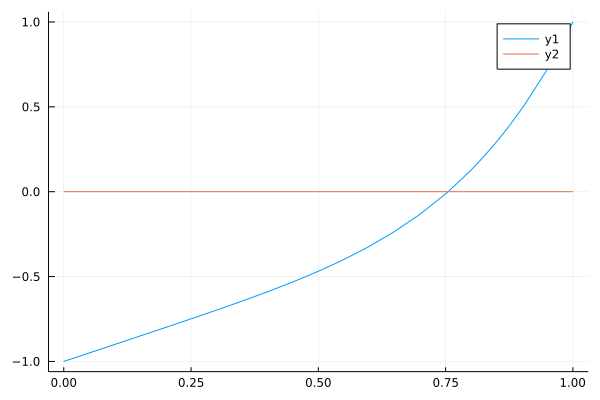

In [1]:
f(x) = x^5 + x - 1
plot(f, 0, 1)
plot!(zero, 0, 1)

<p>We can see that the zero is near $0.75$, but be careful reading too much into a graph. Since there are only so many pixels in a graph, and typically even fewer points chosen, what looks like a curve is really just a stick figure if you zoom in far enough. Replotting over a smaller domain can give more accuracy, but it is better to use a graph to get a sense of <em>where</em> the desired answer is and then use a <em>numeric</em> method to "zoom" in on the answer. In this project we discuss one such method for "zooming in" – the <em>bisection method</em>.</p>

<h4>The bisection method</h4>

<p>The notes mention the bisection method for zero-finding. This is based on the <em>intermediate value theorem</em>:</p>

<blockquote>
<p>The <a href="https://en.wikipedia.org/wiki/Intermediate_value_theorem">intermediate value theorem</a> states that if a continuous function, $f$, over an interval, $[a, b]$, takes values $f(a)$ and $f(b)$ at each end of the interval, then it also takes any value between $f(a)$ and $f(b)$ at some point within the interval.</p>
</blockquote>

<p>For our purposes, this is specialized to "Bolzano's theorem":</p>

<blockquote>
<p>If a continuous function has values of opposite sign inside a closed interval, then it has a zero in that interval</p>
</blockquote>

<p>In particular, if $f(x)$ is <em>continuous</em> on $[a,b]$ <strong>and</strong> $f(a)$ and $f(b)$ have different signs, then there <strong>must</strong> be a value $c$ with $a < c < b$ with $f(c) = 0$.</p>

<p>There may be more than one zero, but there is a guarantee of at least one.</p>

<h2>The bisection algorithm</h2>

<p>Not all functions can have their real zeros solved algebraically, and not all applications can be answered by the accuracy provided by a graph. In such situations, numeric methods may be of interest.</p>

<p>The <code>MTH229</code> package defines a <code>bisection</code> method implementing the bisection method, it assumes it has been passed values $a < b$ with $f(a)$ and $f(b)$ having different sign. In short, <code>&#91;a,b&#93;</code> is a bracketing interval for $f$.</p>

<p>The algorithm to find a value $c$ proceeds in steps. At each step the bracketing interval is split in two at a value $m$. One – and only one – of these three things must be true: either $[a,m]$ is a bracketing interval, $[m,b]$ is a bracketing interval, or $f(m) = 0$. If the latter, the algorithm stops, otherwise the new bracketing interval splits the original one in half and the process proceeds again.</p>

<p>Running this demo illustrates. </p>

In [1]:
bisection(sin,  3, 4)

<p>In the demo, after $8$ iterations, there aren't enough pixels to see more subdivisions, but mathematically, unless the algorithm finds an exact zero, this process would continue infinitely, with the bracketing interval getting infinitely small. In the process this traps the zero. </p>

<p>On the computer, the process basically stops when the size of the bracketing interval gets too small to subdivide using floating point numbers, unless instructed otherwise.</p>

<h2>The fzero function</h2>

<p>In the <code>Roots</code> package is the <code>fzero</code> method that implements the bisection method, only a bit more carefully. The <code>MTH229</code> package loads this for you.</p>

<p>For a bracketing interval, it is guaranteed to find a <code>c</code> such that the function changes sign between adjacent floating point values around <code>c</code>, or <code>c</code> is an exact zero. It is used as: <code>fzero&#40;f, a, b&#41;</code>:</p>

In [1]:
f(x) = x^2 - 2
fzero(f, 1, 2)			# finds sqrt(2)

1.4142135623730951

<h3>Solving for $f(x) = g(x)$.</h3>

<p>Many problems are more naturally expressed by solving $f(x) = g(x)$, and not $f(x) = 0$, as expected by <code>fzero</code>. This is no issue, as it only requires the extra step of defining the difference function $h(x) = f(x) - g(x)$, as $h(x) = 0$ implies $f(x) = g(x)$.</p>

<p>For example, consider this question:</p>

<p>Find the intersection point of $4 - e^{x/10} = e^{x/15}$ by first   graphing to see approximately where the answer is. From the graph,   identify a bracket and then use <code>fzero</code> to numerically estimate the   intersection point.</p>

<p>We could plot both functions:</p>

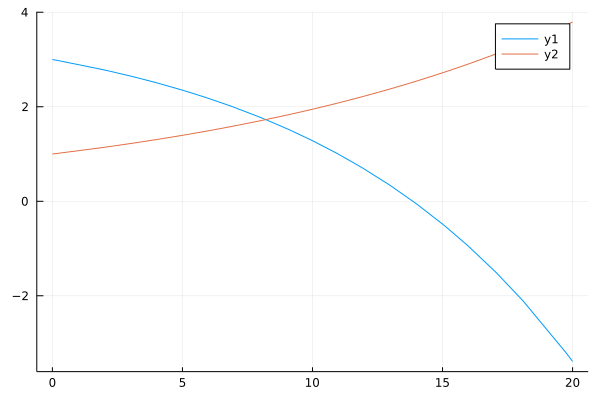

In [1]:
f(x) = 4 - exp(x/10)
g(x) = exp(x/15)
plot(f, 0, 20)
plot!(g, 0, 20)

<p>Or we could plot the difference:</p>

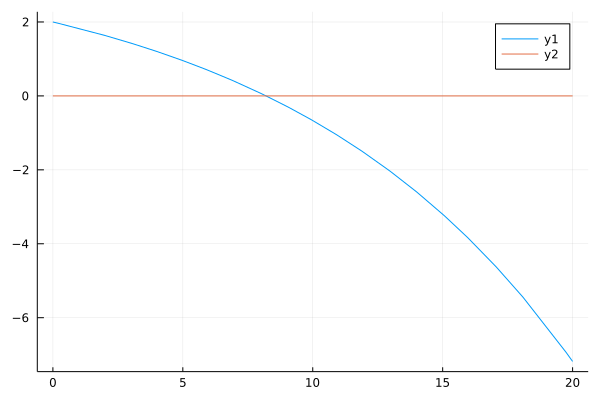

In [1]:
h(x) = f(x) - g(x)
plot(h, 0, 20)
plot!(zero, 0, 20)

<p>From <em>either</em> graph, we see quickly that the interval $[5,10]$ will be a bracketing interval for $h$, so we can find the intersection point with:</p>

In [1]:
fzero(h, 5, 10)

8.205886667065423

<h2>The fzeros function</h2>

<p>How to find <em>all</em> zeros of a function within a given interval? The bisection method guarantees only one between a <em>bracketing</em> interval. Well, a simple algorithm–-which is not guaranteed to find all zeros, but should do <em>pretty</em> well–-is to divide the interval into many <em>subintervals</em> and for each, see if the subinterval is a <em>bracketing</em> interval, and if so find a zero in that subinterval.</p>

<p>The <code>fzeros&#40;f, a, b&#41;</code> function does basically that, though it works a bit harder to find answers even when the subinterval is not a bracketing interval. It makes no guarantees though, as the bisection method can–-and <em>may</em>–-miss some answers. The <code>fzeros</code> function is only <em>pretty</em> good at finding all the zeros over the interval. For some functions – especially those cooked up by clever math professors – the choice of interval can lead to <code>fzeros</code> finding fewer than is mathematically possible. The function should be used in combination with a plot and with as narrow an interval specified, as reasonable.</p>

<p>Since <code>fzeros</code> can return 0, 1, or more zeros, it uses a container to hold its answers. This means that some numbers won't print with 16 digits displayed. This does not mean the accuracy is lost, it is just not displayed.</p>

<h3>Using answers</h3>

<p>The output of <code>fzeros</code> is a collection of values. It may be desirable to pass these onto another function. This is essentially <em>composition</em>.  For example, we can check our work using this pattern:</p>

In [1]:
f(x) = cos(x) + cos(2x)
zs = fzeros(f, 0, 2pi)
f.(zs)     # broadcast f over each of the zs

3-element Vector{Float64}:
  3.3306690738754696e-16
  0.0
 -1.9984014443252818e-15

<p>We see that the values are all basically $0$, save for round-off error.</p>

<p>The key above is the use of the "dot" to <em>broadcast</em> <code>f</code> over <em>each</em> value in the container <code>zs</code>. Just entering <code>f&#40;zs&#41;</code> would lead to error about no matching method.</p>

<hr />